# 2. Modelos de distribución multivariados
## 2.1. Funciones de distribución y densidad

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


## 2.1.0. Preliminares

Referencia: [Capítulo 6 de Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)

---

### Variables aleatorias

Suponer que $X$ representa una cantidad desconocida de interés, como la temperatura de una máquina. Si los valores de $X$ son desconocidos o cambian, decimos que $X$ es una variable aleatoria, o **VA**. El conjunto de todos los valores *posibles* se denota como $\mathcal{X}$, llamado espacio muestral o espacio de estados. Un evento es un *sub*conjunto de valores del espacio muestral. Por ejemplo, si $\mathcal{X}$ es el lado de un dado al ser lanzado, $\mathcal{X} = \{ 1, 2, 3, 4, 5, 6 \}$, el evento "cae 1" se denota $X = 1$, y "ver un número impar" se denota $X \in \{ 1, 3, 4\}$, el evento "cae entre 4 y 6" como $4 \leq X \leq 6$.

**Nota**: no confundir el espacio muestral $\mathcal{X}$ con la VA $X$. En el segundo caso, la VA toma valores numéricos, es una función de los elementos de $\mathcal{X}$ que mapea de $\mathcal{X}$ al conjunto de los reales o naturales. $\mathcal{X}$ puede o no consistir en valores numéricos. Por ejemplo, si  el espacio muestral $\mathcal{X}$ son los posibles resultados de lanzar dos monedas tenemos $\mathcal{X}=\{HH, HT, TT\}$. Al evento "cantidad de veces que sale caras, o $H$", la variable $X$ mapea de $\mathcal{X}$ tres posibles resultados: $X(HH)=2, X(HT)=1, H(TT)=0$.

## 2.1.1. Variables aleatorias y sus distribuciones

### VA discretas

Si $\mathcal{X}$ es finito o contable infinito (cada miembro de $\mathcal{X}$ puede asociarse con un elemento de $\mathbb{N}$), entonces $X$ es una variable aleatoria *discreta*. En este caso, denotamos la probabilidad de un evento que $X$ toma como $\text{Pr}(X=x)$. Definimos la **función de masa de probabilidad** ($\text{\sf pmf}$ en inglés) como la función que computa la probabilidad de cada valor de la VA

$$
  p(x) \overset{\Delta}{=} \text{Pr}(X = x)
$$

$p(x)$ satisface $0\leq p(x) \leq 1$ y $\sum_{x\in \mathcal{X}} p(x) = 1$. 

Algunas propiedades de $\Pr$ son:

1. Si $\emptyset$ es un conjunto nulo, entonces $\Pr(\emptyset)=0$.
2. Si $A \subset B$, entonces $\Pr(A)\leq \Pr(B)$.
3. Si $A^c$ denota el complemento de $A$, entonces $\Pr(A^c)=1-\Pr(A)$.
4. Si $A \cap B = \emptyset$ denota la intersección nula de $A$ y $B$, entonces $\Pr(A \cup B)=\Pr(A) + \Pr(B)$, $\Pr$ es aditiva para eventos disjuntos.
5. De otra manera, para eventos arbitrarios $A, B$, $\Pr(A \cup B)=\Pr(A) + \Pr(B)-\Pr(A\cap B)$. 
6. Dos eventos $A$ y $B$ son independientes si $\Pr(A \cup B)=\Pr(A)\Pr(B)$. 
   Por ejemplo, lanzar una moneda dos veces. Cada lanzamiento es independiente del otro. Si queremos saber la probabilidad de que en ambos lanzamientos salga caras, esa probabilidad sería $\Pr(H_1\cap H_2)=(1/2)(1/2)$.

---

Podemos imaginarnos la distribución de probabilidad de muchas variables aleatorias como el llenado de un arreglo multidimensional. Por ejemplo, en la siguiente imagen (adaptado de MML-6.2)

<p align="center">
  <img src="img/joint_dist_tikz.svg" width='40%' />
</p>

muestra dos variables aleatorias bivariadas, $X$ (que puede tomar valores $x_j, j = 1, 2, \dots, M$) y $Y$ (que puede tomar valores $i=1, 2, \dots, L$). 

- $c_j$: conteo marginal en $x_j$
- $r_i$: conteo marginal en $y_i$
- $n_{ij}$: casos en la celda $x_j, y_i$


La probabilidad (*conjunta*) de que $X=x, Y=y$ se define como

$$
  p(x, y) \overset{\Delta}{=} \text{Pr}(X = x, Y = y)
$$

$p(x, y)$ se lee "la probabilidad de $x$ y $y$", en ocasiones escrito usando notación de teoría de conjuntos como $p(x \cap y)$. Cada entrada (cada celda) en la tabla se calcula contando la cantidad de casos que $(x_j,y_i)$ suceden conjuntamente

$$
\text{Pr}(X = x_j, Y = y_i) = \frac{n_{ij}}{N} \tag{1}
$$

En la tabla, si contamos todos los casos de la fila $i$ tenemos la cantidad total de veces que $y_i$ sucede, y lo llamamos $r_i$. Si contamos la columna $j$ tenemos la cantidad total de veces que $x_j$ sucede, y que llamamos $c_j$.

La *probabilidad marginal* de $x$, es decir, la probabilidad que $X=x$ sin importar el valor de $Y$ se escribe como $p(x)$ y se calcula como sigue

$$
  p(X = x_j) = p(x_j) = \frac{c_j}{N} \tag{2}
$$

El número de casos en la columna $j$ es la suma de casos en cada celda *en esa columna*, por lo que $c_j = \sum_i n_{ij}$ (dejando fija $i$). Por lo tanto, 

$$
  p(x_j) = \sum_{i=1}^Lp(x_j, y_i) \tag{3}
$$

A la ecuación (3) se le conoce como la *regla de la suma*. Notar que se fija la columna $j$ y se itera sobre las filas $i=1, 2, 3$, por lo que por cada columna $j$ tenemos una probabilidad $p(x_j)$, que llamamos *la distribución marginal* de $x$.

Si consideramos los casos en los que $X=x_j$, la *fracción* de casos en los que $Y=y_i$ se escribe como $p(Y=y_i | X=x_j)$, probabilidad que es conocida como *probabilidad condicional* de $Y=y_i$ *dado* que $X=x_j$. Se obtiene encontrando la fracción de puntos en una columna $j$ que caen en una celda $(i,j)$ dada

$$
  p(y_i | x_j) = \frac{n_{ij}}{c_j} \tag{4}
$$

Notar que $c_j$ es la cantidad total de valores para los cuales $X=x_j$, y $n_{ij}$ es una celda particular. Con las ecuaciones (1), (2) y (4) podemos derivar la siguiente relación:

$$
  \begin{align*}
    p(x_j, y_i) &=  \frac{n_{ij}}{N} =  \frac{n_{ij}}{c_j} \frac{c_j}{N}\\
                &= p(y_i | x_j)p(x_j) \tag{5}
  \end{align*}
$$

La ecuación (5) es conocida como *regla del producto*.

Eliminando la notación excesiva, podemos sintetizar las dos reglas como sigue

$$
  \begin{align*}
    \text{ \bf{regla de la suma}}\quad\quad   &p(x) = \sum_{y}p(x,y) \\
    \text{ \bf{regla del producto}}\quad\quad &p(x, y) = p(y|x)p(x) 
  \end{align*}
$$

<!-- <p align="center">
  <img src="img/regla_sum_prod2.png" width='50%' />
</p> -->

Considerando la simetría $p(x,y) = p(y,x)$ y que $p(y,x) = p(x|y)p(y)$, encontramos la siguiente relación

$$
 \begin{align*}
  p(y|x)p(x) &=  p(x|y)p(y)\\
  p(y|x)     &=  \frac{ p(x|y)p(y)}{p(x)}
 \end{align*} \tag{6}
$$

Con 

\begin{align*}
1.  & f(x, y) \geq 0\\
2.  & \sum_{x,y}f(x, y) = 1
\end{align*}

La ecuación (6) es llamada *Teorema de Bayes*, y tiene una importancia en ML y estadística que no puede ser exagerada. 

---

## Función de distribución para VA discretas

Para cualesquiera variables $X_1, X_2$, la función de distribución conjunta es

$$
  F(x_1, x_2) = \Pr(X_1 \leq x_1, X_2 \leq x_2)=\sum_{X_1 \leq x_1}\sum_{X_2 \leq x_2}f(x_1,x_2)
$$

#### Muestreando de una distribución conjunta

Crearemos un data frame que contenga posibles valores de $X$ y $Y$, así como sus frecuencias de ocurrencia. Después, usando la función `slice_sample()` del paquete `{dplyr}` tomaremos una muestra aleatoria. Básicamente, lo que hace `slice_sample()` es tomar filas (*slices*) del data frame original, solo que en este caso permitiremos que cada fila pueda ser seleccionada más de una vez. La cantidad de veces que cada fila puede ser seleccionada será, aproximadamente, `wgts/sum(wgts) * n`.

In [14]:
library(tidyverse)
library(kableExtra)
library(IRdisplay)
# crear distribución conjunta {X,Y}
data_for_sampling <- data.frame(
  Y = rep(0:3, times = 3),
  X = rep(0:2, each = 4)
)
data_for_sampling <- data_for_sampling |>
  mutate(wgts = c(0, 3, 9, 3, 2, 18, 18, 2, 3, 9, 3, 0))
# tomar una muestra aleatoria de la dist conjunta X,Y, usando wgts como pesos,
# o frecuencia relativa de cada celda.
set.seed(452) # para reproducibilidad
sampled_data <- data_for_sampling |>
  slice_sample(
    n = 10000, # 10k muestras
    replace = TRUE, # con reemplazo
    weight_by = data_for_sampling$wgts # pesos relativos de cada celda
  )
# tabla original
sampled_data[, c(1, 2)] |>
  add_rownames(var = 'ID') |> 
  head(5) |>
  kbl() |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()
# crear una tabla de frecuencia
table(sampled_data[, c(1, 2)]) |>
  as.data.frame.matrix() |>
  rownames_to_column("Y/X") |>
  kbl() |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

ID,Y,X
1,2,1
2,1,0
3,1,1
4,3,1
5,0,1


Y/X,0,1,2
0,0,325,400
1,439,2544,1351
2,1273,2524,418
3,433,293,0


## Ejercicios a mano

1. La segunda tabla muestra la tabla de frecuencias de la muestra total, ¿cuál es la probabilidad $p(y=0, x=1)$?
2. ¿Cuál es la probabilidad $p(x=1 \mid y=0)$?
3. Encontrar $F(X\leq 1,Y\leq 2)$

In [15]:
# ejercicio 1
# xy <- sampled_data[, c(1, 2)] |> head(5)
# x <- xy[, "X"]
# y <- xy[, "Y"]
# x_bar <- mean(x)
# y_bar <- mean(y)
# # xy centered
# x0 <- x - x_bar
# y0 <- y - y_bar
# cov_dot <- (1 / (length(x) - 1)) * x0 %*% y0 |> as.numeric()
# cov_r <- cov(x, y)

# list(
#   "media x" = x_bar, 
#   "media y" = y_bar,
#   x0 = x0,
#   y0 = y0,
#   'covarianza con producto punto' = cov_dot,
#   'covarianza real' = cov_r
# )

<!-- Para el ejercicio 1:

Las medias son $\bar x=0.8, \bar y = 1.4$, 
$$
  \mathbf{x}_0 = \{0.2,-0.8,0.2,0.2,0.2\}, \mathbf{y}_0 = \{0.6,-0.4,-0.4,1.6,-1.4\}
$$
el producto punto

$$
\mathbf{x}_0^\top \mathbf{y}_0 = 
  \begin{bmatrix}
  0.2 & -0.8 & 0.2 & 0.2 & 0.2
  \end{bmatrix}
  \begin{bmatrix}
  0.6\\ -0.4\\ -0.4\\ 1.6\\ -1.4
  \end{bmatrix} = 0.2*0.6 + -0.8*-0.4 + 0.2*-0.4 + 0.2*1.6 + 0.2*-1.4 = 0.4
$$

Dividido entre $1/(n-1)$ es $\frac{1}{5-1}0.4=0.1$ -->

Para el ejercicio 2

In [16]:
xt <- table(sampled_data[, c(1, 2)]) |>
  as.data.frame.matrix()
# obtener la distribución conjunta de cada celda usando la eq 1
xt_prob <- (xt / sum(xt))
# colorear la celda que corresponde a y=0 x=1
xt_prob[1, 2] <- cell_spec(xt_prob[1, 2], background = "red", color = "black")
# imprimir la tabla
xt_prob |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

,0,1,2
0,0.0000,0.0325,0.0400
1,0.0439,0.2544,0.1351
2,0.1273,0.2524,0.0418
3,0.0433,0.0293,0.0000


La celda en rojo corresponde a la probabilidad

$$
  p(y=0, x=1) = \frac{325}{10000}
$$

Para el ejercicio 3

Ahora, para calcular la probabilidad condicional $p(x=1|y=0)$ debemos obtener la probabilidad marginal de $y$, o $p(y=0)$.

In [17]:
library(glue)
xt_py <- xt |>
  mutate(
    'p(y)' = glue("{rowSums(xt)}/{sum(xt)}={rowSums(xt)/sum(xt)}")
  )
xt_py |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  column_spec(5, color = "black", background = "#d4d1d1") |>
  as.character() |>
  display_html()

,0,1,2,p(y)
0,0,325,400,725/10000=0.0725
1,439,2544,1351,4334/10000=0.4334
2,1273,2524,418,4215/10000=0.4215
3,433,293,0,726/10000=0.0726


 Luego, la probabilidad condicional será la probabilidad conjunta $p(y=0, x=1)$ dividida por la probabilidad marginal $p(y=0)$

$$
  p(x=1|y=0) = \frac{p(y=0,x=1)}{p(y=0)} = \frac{325/10000}{725/10000} = \frac{13}{29}
$$

En general, la distribución condicional $p(x | y=0)$ se puede obtener como sigue

In [18]:
sampled_data |>
  # filtrar la fila
  filter(Y == 0) |>
  # contar los casos de X condicionales a y=0; crea columna n
  count(X) |>
  # obtener la funcion de masa
  mutate('p(x|y=0)' = n/sum(n)) |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

X,n,p(x|y=0)
1,325,0.4482759
2,400,0.5517241


Para el ejercicio 4.

$F(X\leq 1,Y\leq 2) = p(x=0, y=0)+p(x=0, y=1)+p(x=0, y=2)+p(x=1, y=0)+p(x=1, y=1)+p(x=1, y=2)=0 + 0.0493+0.1273+0.0433+0.0325+0.2544+0.2524=0.7592$

In [19]:
xt <- table(sampled_data[, c(1, 2)]) |>
  as.data.frame.matrix()
# obtener la distribución conjunta de cada celda usando la eq 1
xt_prob <- (xt / sum(xt))
# imprimir la tabla
xt_prob |>
  kbl(escape = FALSE, booktabs = TRUE) |>
  kable_classic_2(full_width = F) |>
  kable_styling() |>
  as.character() |>
  display_html()

,0,1,2
0,0.0000,0.0325,0.0400
1,0.0439,0.2544,0.1351
2,0.1273,0.2524,0.0418
3,0.0433,0.0293,0.0000


La distribución condicional de $x|y=y$ puede verse totalmente diferente que la distribución marginal $p(x)$. En la siguiente imagen, tomada de Bishop (PRML-1.1), se ilustra la distribución de dos variables $X$ y $Y$. $X$ puede tomar 9 valores posibles, y $Y$ 2. La distribución marginal de $X$, la distribución independientemente de qué valores tome $Y$, tiene una forma más achatada (más amplia, con mayor varianza) que la distribución condicional a $Y=1$.

<p align="center">
  <img src="img/marginal_conditional.png" width='60%' />
</p>


#### VA continuas

Si $X\in \mathbb{R}$ es una función real, se denomina *variable aleatoria continua*, y es más natural especificar que $X$ se encuentre en un intervalo, e.g,, $a \leq X \leq b$, dado que en este caso no se puede crear un conjunto *contable* de valores posibles que $X$ puede tomar, pero podemos crear un conjunto finito de *intervalos* en la linea real, y asociar los eventos de $X$ que están en esos intervalos.

##### Distribución acumulada (cdf)

Sea $A = (X \leq a)$, $B = (X \leq b)$ y $C = (a < X \leq b)$ en donde $a < b$. Tenemos que $B$ es la unión de $A$ y $C$, es decir, $B$ toma todos los valores que toman $A$ y $C$. Dado que $A$ y $C$ son mutuamente excluyentes, la probabilidad de $B$ es

$$\text{Pr}(B) = \text{Pr}(A) + \text{Pr}(C) \tag{7} $$

Y la probabilidad de estar en el intervalo $C$ como

$$
  \text{Pr}(C) = \text{Pr}(B) - \text{Pr}(A) \tag{8}
$$

Definimos la distribución de probabilidad acumulada como 

$$
   P(x) \overset{\Delta}{=} \text{Pr}(X \leq x)
$$

Con esto, podemos calcular la probabilidad de estar en un intervalo como

$$
  \text{Pr}(a < X \leq b) = P(b) - P(a) \tag{9}
$$

La cdf gráficamente tiene esta forma, cuyo eje Y se lee "probabilidad de que $X$ tome valores igual o menor a $x$".
Notar que esto es una suma acumulada (o integral) que termina en 1.

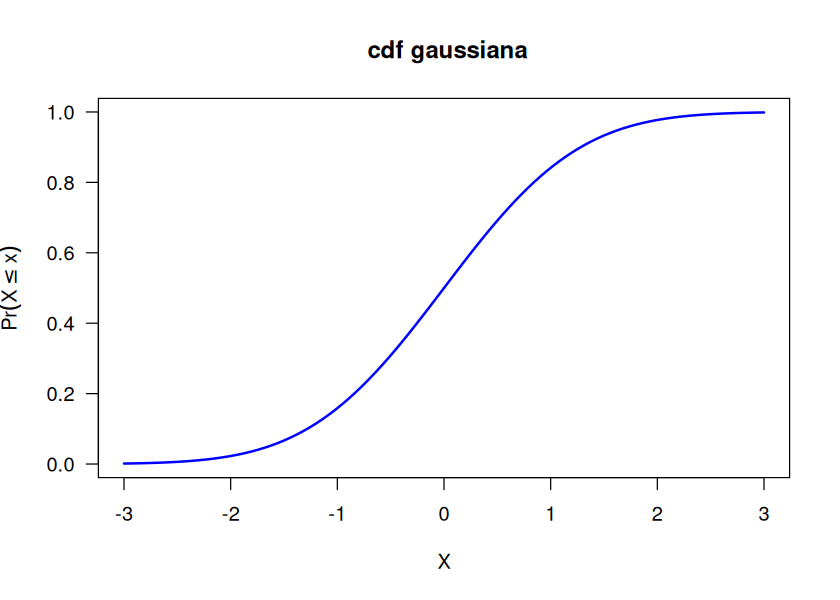

In [20]:
par(las=1)
options(repr.plot.width=7, repr.plot.height=5)
curve(
  pnorm(x, mean = 0, sd = 1),
  from = -3, to = 3, main = " cdf gaussiana",
  xlab = 'X', ylab = expression(Pr(X <= x)),
  col = 'blue', lwd = 2
)

##### Función de densidad

Podemos definir la función de densidad de probabilidad, o *pdf*, como la derivada de la cdf

$$
  p(x) \overset{\Delta}{=} \frac{d}{dx}P(x)
$$

Alternativamente, en vez de $p(x)$ y $P(x)$ se suele usar, para VA continuas, $f(x)$ y $F(x)$ respectivamente.

Y viceversa: la cdf como la integral de la pdf. Dada la pdf, podemos calcular la probabilidad de una variable continua en un intervalo finito como sigue

$$
  \text{Pr}(a <X\leq b) = \int_a^b p(x)dx = P(b) - P(a) \tag{10}
$$

La función de densidad de probabilidad debe satisfacer

$$
\begin{align*}
1)\ &f(x) \geq 0,\ \text{para toda } x,\ -\infty < x < \infty\\
2)\ &\int_{-\infty}^\infty f(x)\text{d}x = 1
\end{align*}
$$

---

**Ejemplo con distribución normal**

La pdf de una normal está dada por

$$
  \mathcal{N}(x\mid \mu, \sigma^2)=  p(x) = \frac{1}{\sigma \sqrt{2\pi}} e\left\{\frac{-(x-\mu)^2}{2\sigma^2}\right\} \tag{10}
$$

que es gobernada (es decir, su forma y sus valores quedan completamente especificados) por $\mu$, la media o el valor central, y $\sigma^2$, llamada la varianza (cuya raíz cuadrada es la desviación estándar $\sigma$, y está en las unidades de $x$ y $\mu$).El recíproco de la varianza es llamado *precisión*, $\tau=1/\sigma^2$. 

En la ecuación (10), el término $\frac{1}{\sigma \sqrt{2\pi}}$ es una constante de *normalización*, que asegura que $p(x)$ sume 1, por lo que

$$
  \int_{-\infty}^\infty p(x)\text{d}x=1
$$

Las siguientes expresiones se cumplen en (10). El valor esperado de $x$ es

$$
  \mathbf{E}[x]=\int_{-\infty}^\infty p(x)x\text{d}x=\mu
$$

Y el valor esperado de $x^2$

$$
  \mathbf{E}[x^2] =  \int_{-\infty}^\infty p(x)x\text{d}x^2=\mu^2 + \sigma^2
$$

La varianza está dada por $\text{var}[x]=\mathbf{E}[x^2] - \mathbf{E}[x]^2$, por lo que $\text{var}[x]=\sigma^2$.

En R se puede confirmar usando `rnorm(n, mean=4, sd=2)`, que regresa una variable aleatoria normalmente distribuida con media de 0 y desviación estándar de 1

In [21]:
x <- rnorm(100000, 4, 3)
mean(x) # media próxima a 4
# la varianza de la ecuacion var(x) = E[x^2] - mu^2
mean(x^2) - mean(x)^2
# la varianza usando la función base de R
var(x) # notar que no ingresamos la varianza en rnorm, sino sd

[1] 4.005229

[1] 8.998725

[1] 8.998815

En la siguiente figura a la izquierda se representa una variable aleatoria normal con media 0 y desviación estándar de 1, conocida como distribución normal estándar, y representada como $\mathcal{N}(\mu=0, \sigma = 1)$ o simplemente $\mathcal{N}(0, 1)$. Para la densidad de probabilidad normal, en R usamos `dnorm(x, mean, sd)`, que nos retorna la densidad en `x`.

A la derecha se representa el área equivalente en la cdf, usando `pnorm`.

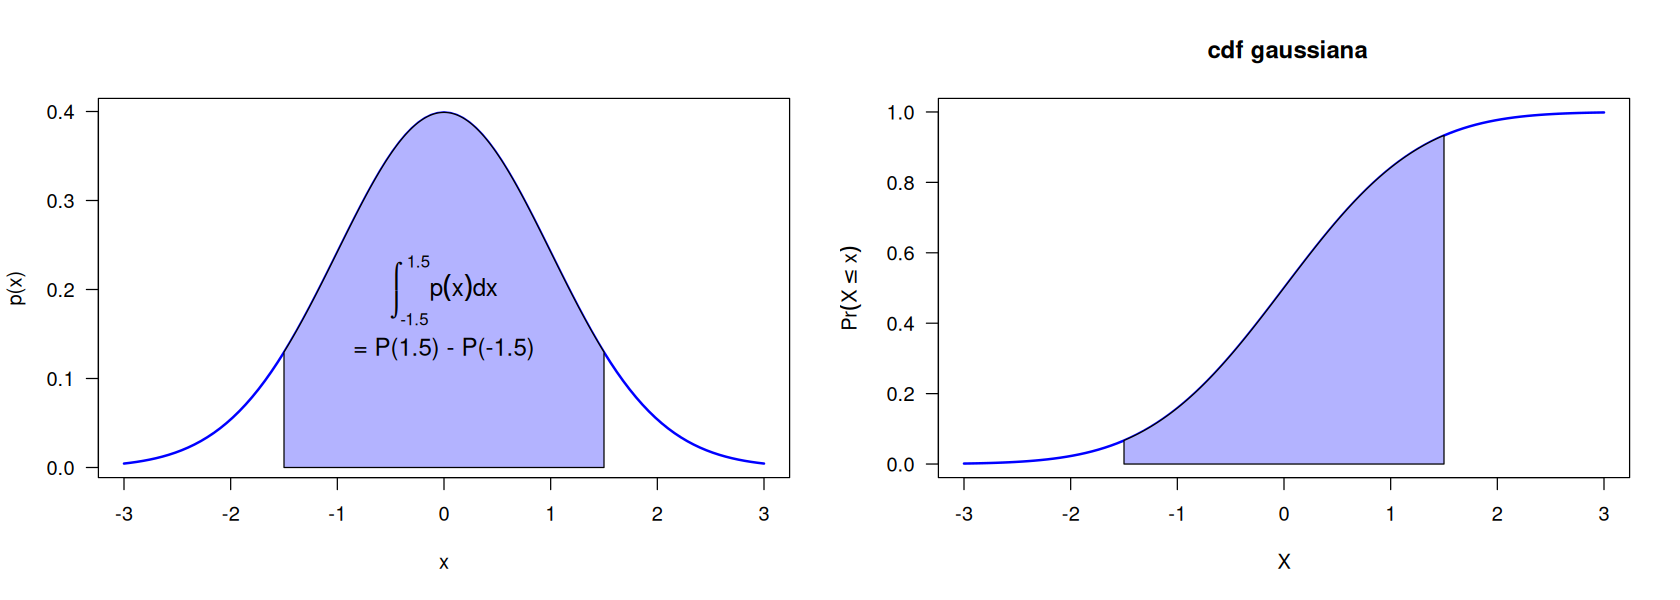

In [22]:
options(repr.plot.width=7*2, repr.plot.height=5)
par(las = 1, mfrow = c(1, 2))
# graficar la curva usando la función de dnorm; curve crea in-situ 101 valores
# para x que van de from a to. Es idéntico a
# x <- seq(from, to, length = 101); plot(x, dnorm(x, 0, 1))
# figura a la izquierda, pdf
curve(
  dnorm(x, 0, 1),
  from = -3, to = 3,
  col = "blue",
  ylab = "p(x)",
  lwd = 2
)
from_x <- -1.5
to_x <- 1.5
# valores para x y y en el área sombreada
sx <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy <- c(0, dnorm(seq(from_x, to_x, 0.01)), 0)
# crear área sombreada con sx y sy
polygon(
  sx, sy,
  col = "#B3B3FF"
)
text(
  x = 0,
  y = dnorm(0, 0) / 2,
  labels = expression(integral(p(x) * dx, -1.5, 1.5)),
  cex = 1.2
)
text(
  x = 0,
  y = dnorm(0, 0) / 3,
  labels = "= P(1.5) - P(-1.5)",
  cex = 1.2
)

# figura a la derecha, cdf
curve(
  pnorm(x, mean = 0, sd = 1),
  from = -3, to = 3, main = " cdf gaussiana",
  xlab = 'X', ylab = expression(Pr(X <= x)),
  col = 'blue', lwd = 2
)
from_x <- -1.5 # en rigor, debería ser -Inf
to_x <- 1.5
sx  <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy  <- c(0, pnorm(seq(from_x, to_x, 0.01)), 0)
polygon(
  sx, sy,
  col = "#B3B3FF"
)

En `R`, la función de densidad acumulada ($\text{\sf cdf}$) para la distribución normal se obtiene con `pnorm(x, mean, sd)` en donde `x` es un vector de *cuantiles*, que es el, o los, valores en $x$ para el cual(es) deseamos obtener su probabilidad (básicamente, un cuantil es la función inversa de $P(x)$).

Para obtener el área sombreada en la anterior figura, usamos `pnorm(b) - pnorm(a)`

In [23]:
pnorm(1.5, mean = 0, sd = 1) - pnorm(-1.5, 0, 1)
# mean = 0, sd = 1 están por defecto, pero los ponemos para mayor claridad

[1] 0.8663856

El área que cubre `pnorm(1.5)` va desde $-\infty$ a 1.5, y el área de `pnorm(-1.5)` va de $-\infty$ a -1.5. Matemáticamente, lo anterior se expresaría como

$$
  P(-1.5 < X < 1.5) = \int_{-1.5}^{1.5}\frac{1}{\sigma \sqrt{2\pi}} e\left\{\frac{-(x-\mu)^2}{2\sigma^2}\right\}
$$

**Ejemplo**

La temperatura promedio de una máquina es de 37°C, con una desviación estándar medida de 1.5. Suponiendo que la distribución de la temperatura puede ser aproximada por una normal, ¿qué tan probable es encontrar una temperatura de 35 o menos?

*Solución*

Queremos hallar la probabilidad $P(X<35)$ sabiendo que $X\sim \mathcal{N}(\mu=37, \sigma=1.5)$.

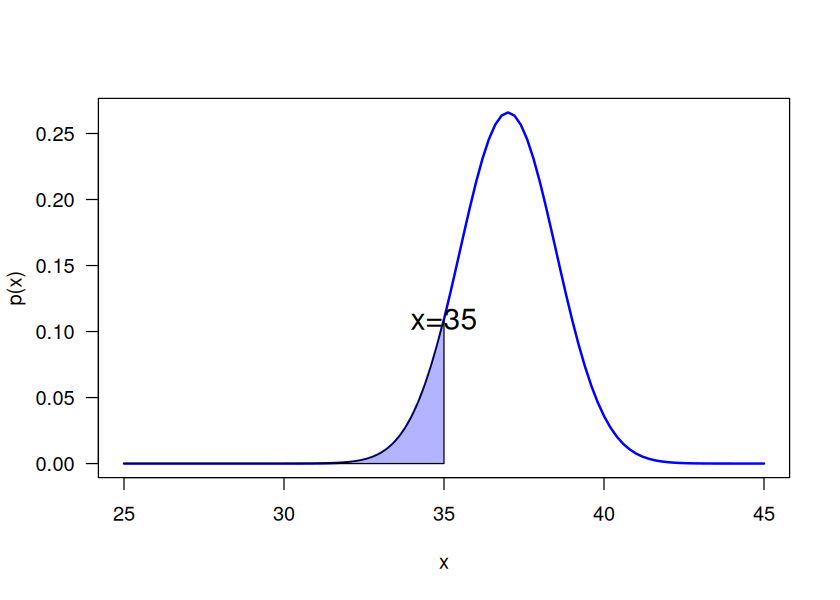

In [11]:
options(repr.plot.width=7, repr.plot.height=5)
par(las = 1)
curve(
  dnorm(x, 37, 1.5),
  from = 25, to = 45,
  col = "blue",
  ylab = "p(x)",
  lwd = 2
)
from_x <- 25 # en rigor, debería ser -Inf
to_x <- 35
sx  <- c(from_x, seq(from_x, to_x, 0.01), to_x)
sy  <- c(0, dnorm(seq(from_x, to_x, 0.01), 37, 1.5), 0)
polygon(
  sx, sy,
  col = "#B3B3FF"
)
text(
  x = 35,
  y = dnorm(35, 37, 1.5),
  labels = 'x=35',
  cex = 1.5
)

El área se obtiene en R con el siguiente código:

In [12]:
pnorm(q = 35, mean = 37, sd = 1.5)
# ¿cuál sería la probabilidad de tener 37 o menos?

[1] 0.09121122

En Python se obtiene con 

```python
import scipy.stats
scipy.stats.norm(37, 1.5).cdf(35)
```

En contraste con las **VA** discretas, la probabilidad de que una variable continua $X\in \mathbb{R}$ tome un valor particular, $p(X = x)$, es 0. Es como integrar la función de densidad de la siguiente manera:

$$
  Pr(a \leq X \leq a) = \int_a^b f(x)dx = P(a) - P(a)
$$

Por esta razón, con $\text{\sf pdf}$ solo calculamos probabilidades en intervalos.

---

Para VA continuas, las reglas de suma y producto son

$$
  \begin{align*}
    \text{ \bf{regla de la suma}}  \quad\quad   &f(x) = \int_y f(x,y)\text{d}y \\
    \text{ \bf{regla del producto}}\quad\quad &f(x, y) = f(y|x)f(x) 
  \end{align*}
$$

En donde $f(x)$ es la función de probabilidad marginal, y se integra *con respecto a* $y$. Lo mismo si queremos encontrar la marginal de $y$ tenemos que integrar $f(x,y)$ *con respecto a* $x$.

## Función acumulada de probabilidad conjunta

Sean $X_1, X_2$ variables aleatorias continuas con función de distribución conjunta $F(x_1, x_2)$. La función de distribución bivariante $F(x_1, x_2)$ es

$$
  F(x_1, x_2) = P(X_1 \leq x_1, X_2 \leq x_2),\quad -\infty < x_1 < \infty, -\infty < x_2<\infty
$$

Si existe una función no negativa $f(x_1, x_2)$, se obtiene

\begin{align*}
  F(x_1, x_2) = \int_{-\infty}^{x_2} \int_{-\infty}^{x_1} f(t_1, t_2)\text{d}t_1\text{d}t_2
\end{align*}

Para toda $-\infty < x_1<\infty, -\infty < x_2<\infty$. En donde $t_1, t_2$ son solo variables de integración.

Satisfacen

\begin{align*}
  1. &f(x_1, x_2)\geq 0\quad \text{para toda }x_1, x_2\\
  2. &\int_{-\infty}^\infty f(x_1, x_2) \text{d}x_1\text{d}x_2= 1
\end{align*}

**Ejemplos**

1. Dada $f(y) = cy^2,\ 0 \leq y \leq 2$ y $f(y)=0$ en cualquier otra parte, encuentre el valor de $c$ para el cuál $f(y)$ es una función de densidad válida.

*Solución*

Para obtener $c$, requerimos un valor tal que se cumpla

$$
  F(y) = \int_{-\infty}^\infty f(y)\text{d}y = 1
$$

Lo que nos da

$$
  F(y) = \int_0^2 cy^2\text{d}y=\frac{cy^3}{3} \Bigg|_0^2=\frac{8}{3}c
$$

Sustituyendo $\frac{8}{3}c=1$ nos da que $c=3/8$.

2. Encontrar $P(1\leq Y \leq 2)$ para la función del ejemplo 1, también encontrar $P(1< Y < 2)$

*Solución*

Dado que ya encontramos el valor de  que satisface $F(y) = \int_{-\infty}^\infty f(y)\text{d}y = 1$, la sustituimos.

$$
  P(1\leq Y \leq 2) = \int_1^2 f(y)\text{d}y= \frac{3}{8}\int_1^2 y^2\text{d}y=7/8
$$

3. Como una medida de inteligencia, a unos ratones se les toma el tiempo que tardan para pasar por un laberinto para llegar a una recompensa (alimento). El tiempo en segundos necesario para cualquier ratón es una variable aleatoria $Y$ con función de densidad dada por

$$
  f(y) = \begin{cases}
    \frac{b}{y^2},\ &y\geq b\\
    0,\ &\text{en cualquier otro punto}
  \end{cases}
$$

En donde $b$ es el tiempo mínimo posible para recorrer el laberinto. Demostrar que $f(y)$ tiene las propiedades de una función de densidad.

*Solución*

Dado que $b$ es un tiempo, no puede ser negativo. Además, $f(y)$ tiene el término cuadrático $y^2$, que tampoco puede ser negativo, por lo que $f(y) \geq 0$.

El mínimo valor que puede tener $y$ es $b$. Por lo tanto

\begin{align*}
F(y) &= \int_{b}^\infty \frac{b}{y^2}\text{d}y= 1\\  
     &= \frac{by^{-2+1}}{-2+1}\Bigg|_b^\infty=-\frac{b}{y}\Bigg|_b^\infty=0-\left(-\frac{b}{b}\right)=1
\end{align*}



4. En el ejemplo 1 determinamos que $f(y)=(3/8)y^2$ para $0\leq y \leq 2, f(y)=0$ en cualquier otra parte. Si la variable $Y$ tiene esta función de densidad, encontrar $\mu=\mathbf{E}[Y], \sigma^2=\text{var}[Y]$, recordando que $\text{var}[x]=\mathbf{E}[x^2]-(\mathbf{E}[x])^2$.

*Solución*

\begin{align*}
\mathbf{E}[Y] &= \int_{-\infty}^\infty yf(y)\text{d}y= \int_{-\infty}^\infty y\frac{3y^2}{8}\text{d}y = \frac{3}{8}\cdot\frac{1}{4}y^4 \Bigg|_0^2=1.5\\
\text{para } &\mathbf{E}[Y^2]\quad \text{se obtiene}\\
\mathbf{E}[Y^2] &= \int_{-\infty}^\infty y^2f(y)\text{d}y= \int_{-\infty}^\infty y^2\frac{3y^2}{8}\text{d}y = \frac{3}{8}\cdot\frac{1}{5}y^5 \Bigg|_0^2=2.4\\
\text{por }&\text{lo que}\\ 
\text{var}[x]&=\mathbf{E}[x^2]-(\mathbf{E}[x])^2 = 2.4 - 1.5^2 = 0.15
\end{align*}

5. Una partícula radiactiva se localiza en un cuadrado con lados de longitud 1. Denotar como $Y_1, Y_2$ las coordenadas de la ubicación de la partícula. Un modelo razonable para el histograma de frecuencia relativa para $Y_1, Y_2$ es la función bivariante de densidad

$$
  f(y_1, y_2) = \begin{cases}
  1,\quad & 0 \leq y_1 \leq 1, 0 \leq y_2 \leq 1\\
  0, \quad & \text{en cualquier otro punto}
  \end{cases}
$$

Econtrar $F(y_1=0.2, y_2=0.4)$, que es lo mismo que encontrar la probabilidad $P(y_1<0.2, y_2<0.4)$.

*Solución*

\begin{align}
F(y_1=0.2, y_2=0.4)%
      &= \int_{-\infty}^{0.4} \int_{-\infty}^{0.2} f(y_1, y_2)\text{d}y_1\text{d}y_2 \\
      &= \int_{-\infty}^{0.4} \int_{-\infty}^{0.2} (1)\text{d}y_1\text{d}y_2 \\
      &= \int_{-\infty}^{0.4} \left(\int_{-\infty}^{0.2} \text{d}y_1\right)\text{d}y_2\\
      &= \int_{-\infty}^{0.4} \Bigg( y_1\Big|_0^{0.2} \Bigg)\text{d}y_2\\
      &= \int_{-\infty}^{0.4} 0.2 \text{d}y_2 = 0.2y_2\Big|_0^{0.4} = 0.08
\end{align}


